<a href="https://colab.research.google.com/github/Ashkabsha/TimeSeries/blob/main/LSTM_TSLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
df=pd.read_csv("TSLA.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-12,18.762667,19.500000,18.576668,19.369333,19.369333,150231000
1,2018-09-13,19.201332,19.666668,19.011999,19.297333,19.297333,95104500
2,2018-09-14,19.250668,19.822001,19.101334,19.680000,19.680000,101484000
3,2018-09-17,19.336000,20.058001,19.208668,19.656000,19.656000,103314000
4,2018-09-18,19.779333,20.176001,18.366667,18.997334,18.997334,248212500
5,2018-09-19,18.700666,20.000000,18.700001,19.934668,19.934668,124423500
6,2018-09-20,20.237333,20.398666,19.555332,19.888666,19.888666,110241000
7,2018-09-21,19.846666,20.038668,19.691334,19.940001,19.940001,75757500
8,2018-09-24,19.898666,20.200001,19.572001,19.978666,19.978666,72645000
9,2018-09-25,20.000000,20.306667,19.766666,20.066000,20.066000,67225500


<Axes: >

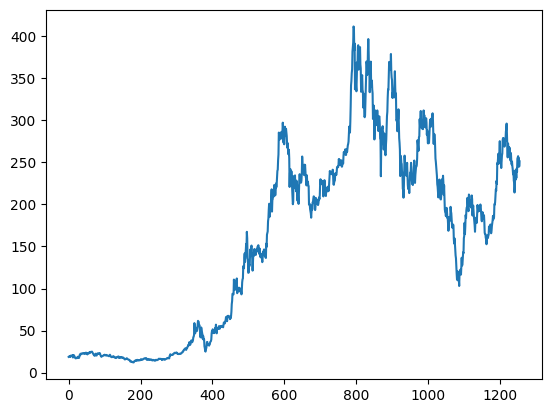

In [4]:
df['Open'].plot()

In [5]:
training = df.iloc[:800, 1:2].values
testing = df.iloc[800:, 1:2].values

In [6]:
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(training)

In [7]:
#sc.inverse_transform(training_scaled[-60:, 0])

In [8]:
x_train = []
y_train = []
for iter in range(60, 800):
    x_train.append(training_scaled[iter-60:iter, 0])
    y_train.append(training_scaled[iter, 0])
x_train, y_train=np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [9]:
algo = Sequential()
algo.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50))
algo.add(Dropout(0.2))
algo.add(Dense(units = 1))
algo.compile(optimizer = 'adam', loss = 'mean_squared_error')
algo.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 12s 120ms/step - loss: 0.0208
Epoch 2/100
24/24 [==============================] - 3s 121ms/step - loss: 0.0048
Epoch 3/100
24/24 [==============================] - 4s 172ms/step - loss: 0.0041
Epoch 4/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0041
Epoch 5/100
24/24 [==============================] - 3s 126ms/step - loss: 0.0040
Epoch 6/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0036
Epoch 7/100
24/24 [==============================] - 4s 177ms/step - loss: 0.0035
Epoch 8/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0045
Epoch 9/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0035
Epoch 10/100
24/24 [==============================] - 3s 121ms/step - loss: 0.0034
Epoch 11/100
24/24 [==============================] - 4s 175ms/step - loss: 0.0027
Epoch 12/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0029
Epoch 13/100

In [10]:
print(algo.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [11]:
'''data_train = df.iloc[:800, 1:2]
data_test = df.iloc[800:, 1:2]
data_total = pd.concat((data_train, data_test), axis = 0)
total_input = data_total[len(data_total) - len(data_test) - 60:].values
total_input = total_input.reshape(-1,1)
total_input = sc.transform(total_input)
x_test = []
for iter in range(60, 519):
    x_test.append(total_input[iter-60:iter, 0])
print(len(x_test[0]))
x_test = np.array(x_test)
print(x_test[0])
x_test.shape'''

'data_train = df.iloc[:800, 1:2]\ndata_test = df.iloc[800:, 1:2]\ndata_total = pd.concat((data_train, data_test), axis = 0)\ntotal_input = data_total[len(data_total) - len(data_test) - 60:].values\ntotal_input = total_input.reshape(-1,1)\ntotal_input = sc.transform(total_input)\nx_test = []\nfor iter in range(60, 519):\n    x_test.append(total_input[iter-60:iter, 0])\nprint(len(x_test[0]))\nx_test = np.array(x_test)\nprint(x_test[0])\nx_test.shape'

In [12]:
"""data_train = df.iloc[:800, 1:2]
data_test = df.iloc[800:, 1:2]
data_total = pd.concat((data_train, data_test), axis=0)
total_input = data_total[len(data_total) - len(data_test) - 60:].values
total_input = total_input.reshape(-1, 1)
total_input = sc.transform(total_input)
x_test = []

# Modify the loop to create a 2D array
for iter in range(60, 519):
    x_test.append(list(total_input[iter-60:iter, 0]))

# Convert x_test to a NumPy array
x_test = np.array(x_test)

# Reshape x_test to have the shape (459, 60)
x_test = x_test.reshape((x_test.shape[0], 60))

print(x_test.shape)  # Should print (459, 60)"""


'data_train = df.iloc[:800, 1:2]\ndata_test = df.iloc[800:, 1:2]\ndata_total = pd.concat((data_train, data_test), axis=0)\ntotal_input = data_total[len(data_total) - len(data_test) - 60:].values\ntotal_input = total_input.reshape(-1, 1)\ntotal_input = sc.transform(total_input)\nx_test = []\n\n# Modify the loop to create a 2D array\nfor iter in range(60, 519):\n    x_test.append(list(total_input[iter-60:iter, 0]))\n\n# Convert x_test to a NumPy array\nx_test = np.array(x_test)\n\n# Reshape x_test to have the shape (459, 60)\nx_test = x_test.reshape((x_test.shape[0], 60))\n\nprint(x_test.shape)  # Should print (459, 60)'

In [13]:
data_train = df.iloc[:800, 1:2]
data_test = df.iloc[800:, 1:2]
data_total = pd.concat((data_train, data_test), axis=0)
total_input = data_total[len(data_total) - len(data_test) - 60:].values
total_input = total_input.reshape(-1, 1)
total_input = sc.transform(total_input)
x_test = []

# Calculate the maximum number of sequences of length 60 that can be created
max_sequences = len(total_input) - 60

# Modify the loop to create a 2D array
for iter in range(max_sequences):
    x_test.append(total_input[iter:iter+60, 0])

# Convert x_test to a NumPy array
x_test = np.array(x_test)

print(x_test.shape)  # Should print (max_sequences, 60)


(456, 60)


In [14]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

predicted_price = algo.predict(x_test)
print(predicted_price.shape)
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price.shape)

(456, 60, 1)
15/15 [==============================] - 3s 32ms/step
(456, 1)
(456, 1)


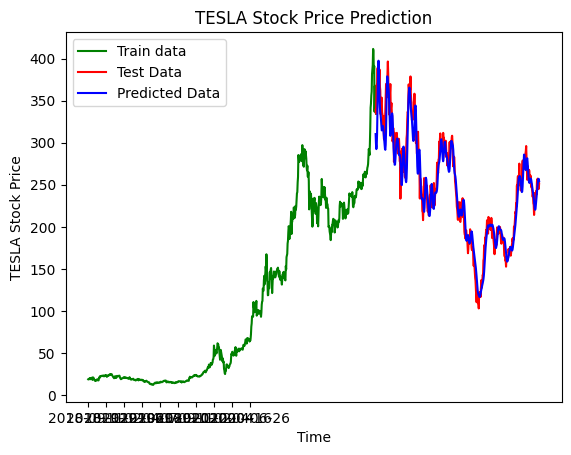

In [41]:
plt.plot(df.loc[:801,'Date'],df.loc[:801,'Open'], color='green',label="Train data")
plt.plot(df.loc[800:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[800:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.xticks(np.arange(0,x_test.shape[0],50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()


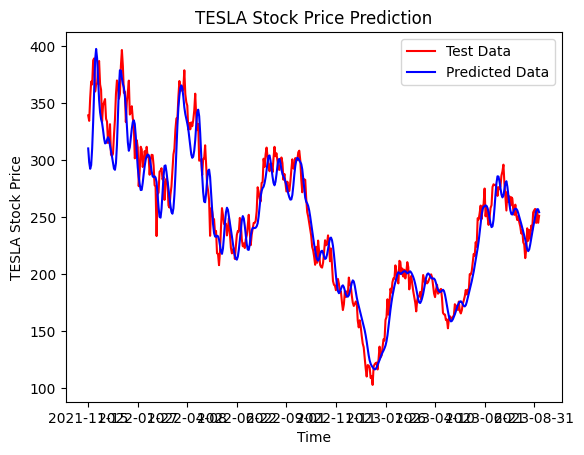

In [42]:

plt.plot(df.loc[800:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[800:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.xticks(np.arange(0,x_test.shape[0],50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(data_test.values,predicted_price)

mse = mean_squared_error(data_test.values, predicted_price)

rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Error (MAE): 13.36
Mean Squared Error (MSE): 319.54
Root Mean Squared Error (RMSE): 17.88


In [32]:
test2=testing.copy()
for i in range(30):
  X=test2[-60:]
  X=X.reshape(60,1)
  X=sc.fit_transform(X)

  X=np.reshape(X,(1,60,1))

  close=algo.predict(X)
  y=sc.inverse_transform(close)

  test2 = np.append(test2, y)


0 (60, 1)
0 (1, 60, 1)
1/1 [==============================] - 0s 32ms/step
0 (1, 60, 1)
1 (60, 1)
1 (1, 60, 1)
1/1 [==============================] - 0s 30ms/step
1 (1, 60, 1)
2 (60, 1)
2 (1, 60, 1)
1/1 [==============================] - 0s 31ms/step
2 (1, 60, 1)
3 (60, 1)
3 (1, 60, 1)
1/1 [==============================] - 0s 31ms/step
3 (1, 60, 1)
4 (60, 1)
4 (1, 60, 1)
1/1 [==============================] - 0s 32ms/step
4 (1, 60, 1)
5 (60, 1)
5 (1, 60, 1)
1/1 [==============================] - 0s 49ms/step
5 (1, 60, 1)
6 (60, 1)
6 (1, 60, 1)
1/1 [==============================] - 0s 50ms/step
6 (1, 60, 1)
7 (60, 1)
7 (1, 60, 1)
1/1 [==============================] - 0s 65ms/step
7 (1, 60, 1)
8 (60, 1)
8 (1, 60, 1)
1/1 [==============================] - 0s 32ms/step
8 (1, 60, 1)
9 (60, 1)
9 (1, 60, 1)
1/1 [==============================] - 0s 35ms/step
9 (1, 60, 1)
10 (60, 1)
10 (1, 60, 1)
1/1 [==============================] - 0s 32ms/step
10 (1, 60, 1)
11 (60, 1)
11 (1, 60, 1)
1/1 

In [37]:
print(test2[-30:])
test2[30].shape

[254.27326965 251.86912537 250.00570679 248.75939941 247.9785614
 247.48095703 247.14248657 246.90562439 246.75570679 246.69343567
 246.71815491 246.82174683 246.98954773 247.20353699 247.44592285
 247.70118713 247.95704651 248.20452881 248.43768311 248.65301514
 248.84906006 249.02598572 249.1849823  249.32823181 249.12965393
 248.945755   248.9291687  248.83308411 248.43809509 248.22033691]


()

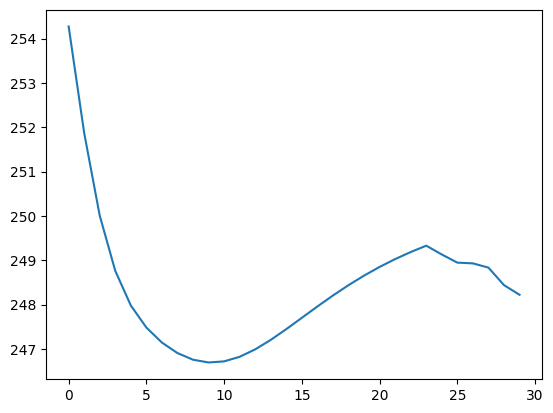

In [45]:
forcasted_data=test2[-30:]
plt.plot(forcasted_data)

In [46]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1251,2023-09-01,257.260010,259.079987,242.009995,245.009995,245.009995,132272500
1252,2023-09-05,245.000000,258.000000,244.860001,256.489990,256.489990,129469600
1253,2023-09-06,255.139999,255.389999,245.059998,251.919998,251.919998,116959800
1254,2023-09-07,245.070007,252.809998,243.270004,251.490005,251.490005,115312900
1255,2023-09-08,251.220001,256.519989,246.669998,248.500000,248.500000,118367700


In [54]:
from datetime import datetime, timedelta

start_date = datetime(2023, 9, 9)  # Starting date
date_list = [(start_date + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(30)]

In [55]:
len(date_list)

30

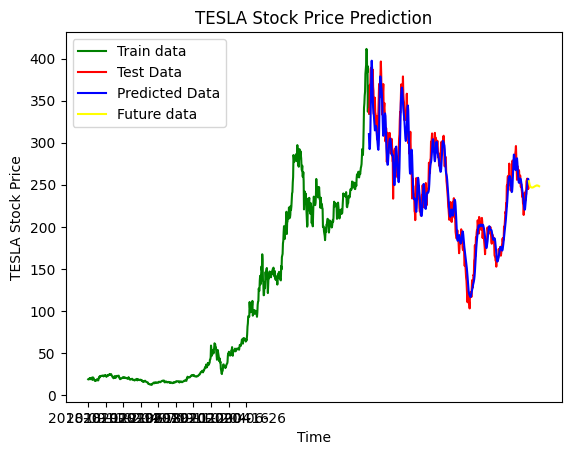

In [62]:

plt.plot(df.loc[:801,'Date'],df.loc[:801,'Open'], color='green',label="Train data")
plt.plot(df.loc[800:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[800:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.plot(date_list,forcasted_data,color='yellow', label="Future data")
plt.xticks(np.arange(0,x_test.shape[0],50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

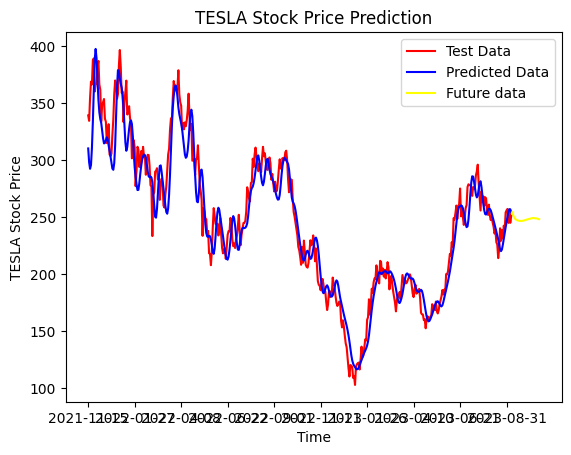

In [63]:

plt.plot(df.loc[800:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[800:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.plot(date_list,forcasted_data,color='yellow', label="Future data")
plt.xticks(np.arange(0,x_test.shape[0],50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

800     2021-11-15
801     2021-11-16
802     2021-11-17
803     2021-11-18
804     2021-11-19
           ...    
1251    2023-09-01
1252    2023-09-05
1253    2023-09-06
1254    2023-09-07
1255    2023-09-08
Name: Date, Length: 456, dtype: object

In [61]:
date_list

['2023-09-09',
 '2023-09-10',
 '2023-09-11',
 '2023-09-12',
 '2023-09-13',
 '2023-09-14',
 '2023-09-15',
 '2023-09-16',
 '2023-09-17',
 '2023-09-18',
 '2023-09-19',
 '2023-09-20',
 '2023-09-21',
 '2023-09-22',
 '2023-09-23',
 '2023-09-24',
 '2023-09-25',
 '2023-09-26',
 '2023-09-27',
 '2023-09-28',
 '2023-09-29',
 '2023-09-30',
 '2023-10-01',
 '2023-10-02',
 '2023-10-03',
 '2023-10-04',
 '2023-10-05',
 '2023-10-06',
 '2023-10-07',
 '2023-10-08']